In [35]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 1.
x_test = x_test.astype('float32') / 1.
x_train = np.reshape(x_train, (len(x_train), 784))    # adapt this if using 'channels_first' image data format
x_test = np.reshape(x_test, (len(x_test), 784)) 

In [37]:
pca = PCA(.95)

In [38]:
lower_dimensional_data = pca.fit_transform(x_train)

In [42]:
lower_dimensional_data.shape

(60000, 154)

In [39]:
pca.n_components_ 

154

In [17]:
approximation = pca.inverse_transform(lower_dimensional_data)

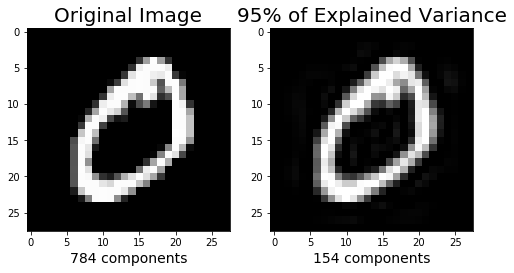

In [21]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x_train[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [24]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()
pca.fit(x_train)

PCA()

In [25]:
pca.n_components_

784

In [26]:
tot = sum(pca.explained_variance_)
tot

3428516.6172768096

In [27]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.704708140346646, 7.095942346437743, 6.169195890262272, 5.389404843304034, 4.868804333157551]


In [28]:
tot = sum(pca.explained_variance_)
tot

3428516.6172768096

In [29]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.704708140346646, 7.095942346437743, 6.169195890262272, 5.389404843304034, 4.868804333157551]


In [30]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

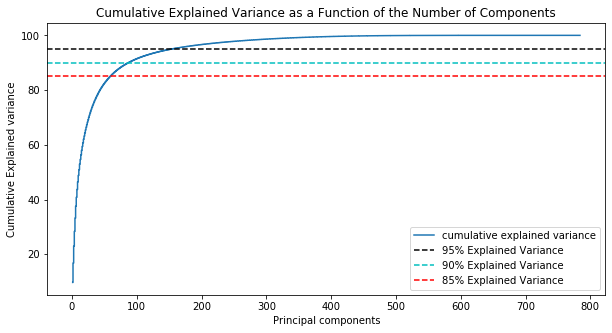

In [31]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [32]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [33]:
componentsVariance

[784, 331, 154, 87, 59]

In [34]:
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal